In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('preprocessed_earthquake_data.csv')
drop_columns = ['Type', 'Magnitude Type', 'Status', 'Source', 'Year', 'Day']
X = df.drop(columns=drop_columns + ['Status_Reviewed'])
y = df['Status_Reviewed']

In [3]:
noise = np.random.normal(0, 0.1, X.shape)
X_noisy = X + noise

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

In [5]:
logreg = LogisticRegression(C=0.5, max_iter=200, solver='saga', penalty='l2', random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.5, max_iter=200, random_state=42, solver='saga')

In [6]:
dtree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [7]:
y_pred_logreg = logreg.predict(X_test)
y_pred_dtree = dtree.predict(X_test)

In [8]:
def print_classification_metrics(y_true, y_pred, model_name):
    print(f"--- {model_name} Metrics ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y_true, y_pred))

In [9]:
print_classification_metrics(y_test, y_pred_logreg, "Logistic Regression")
print_classification_metrics(y_test, y_pred_dtree, "Decision Tree")

--- Logistic Regression Metrics ---
Accuracy: 0.9995728321230244
F1-score: 0.9995724577536473
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       503
         1.0       1.00      1.00      1.00      4179

    accuracy                           1.00      4682
   macro avg       1.00      1.00      1.00      4682
weighted avg       1.00      1.00      1.00      4682

--- Decision Tree Metrics ---
Accuracy: 0.9995728321230244
F1-score: 0.9995732047795841
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       503
         1.0       1.00      1.00      1.00      4179

    accuracy                           1.00      4682
   macro avg       1.00      1.00      1.00      4682
weighted avg       1.00      1.00      1.00      4682



In [10]:
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

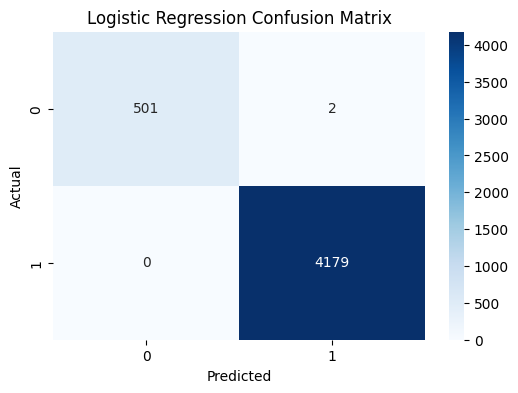

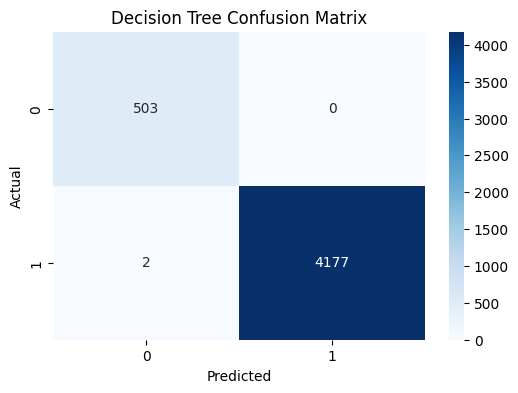

In [11]:
plot_confusion(y_test, y_pred_logreg, "Logistic Regression Confusion Matrix")
plot_confusion(y_test, y_pred_dtree, "Decision Tree Confusion Matrix")

In [12]:
print("MAE (Logistic Regression):", mean_absolute_error(y_test, y_pred_logreg))
print("MSE (Logistic Regression):", mean_squared_error(y_test, y_pred_logreg))
print("R² score (Logistic Regression):", r2_score(y_test, y_pred_logreg))

MAE (Logistic Regression): 0.00042716787697565144
MSE (Logistic Regression): 0.00042716787697565144
R² score (Logistic Regression): 0.9955452734656907


In [13]:
print("MAE (Decision Tree):", mean_absolute_error(y_test, y_pred_dtree))
print("MSE (Decision Tree):", mean_squared_error(y_test, y_pred_dtree))
print("R² score (Decision Tree):", r2_score(y_test, y_pred_dtree))

MAE (Decision Tree): 0.00042716787697565144
MSE (Decision Tree): 0.00042716787697565144
R² score (Decision Tree): 0.9955452734656907


In [14]:
misclassified_logreg = X_test[y_test != y_pred_logreg]
misclassified_dtree = X_test[y_test != y_pred_dtree]

In [15]:
print("--- Misclassified Samples (Logistic Regression) ---")
display(misclassified_logreg.head())

print("--- Misclassified Samples (Decision Tree) ---")
display(misclassified_dtree.head())

--- Misclassified Samples (Logistic Regression) ---


,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Month_sin,Month_cos,Hour_sin,Hour_cos,Type_Explosion,...,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW
8618,1.163314,-1.329714,-0.647148,0.192739,-0.182387,-0.528560,-1.379901,-0.465852,1.413650,0.082688,...,0.914019,-0.030350,-0.202183,-0.032166,-0.204681,0.013559,-0.034147,-0.163431,0.222188,0.022584
9541,-1.439125,-0.985075,-0.589396,-0.258554,-0.080831,-0.770308,-1.274822,-0.132539,-1.502502,0.149359,...,0.983816,-0.101186,-0.121376,0.064645,-0.052126,0.027212,0.057958,0.009322,0.144778,0.068081


--- Misclassified Samples (Decision Tree) ---


,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Month_sin,Month_cos,Hour_sin,Hour_cos,Type_Explosion,...,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW
22385,1.997143,-1.44301,0.239829,0.858169,0.026305,-1.308673,0.042892,-1.375779,-0.376106,0.021886,...,-0.054138,0.024246,-0.066182,0.034447,0.093895,0.085689,-0.060811,0.103509,0.199172,-0.145152
22201,1.979905,-1.66799,0.187274,-0.710064,-0.479091,0.695956,-1.304037,-0.696550,-1.213688,-0.095581,...,0.048369,-0.142839,0.034308,0.060703,0.041494,0.015871,-0.069428,-0.038082,0.019377,-0.134162
